In [18]:
from nutri_scores import show_confusion_matrix, PessimisticMajoritySorting, values_to_scale
import pandas as pd

In [19]:
# Read 'results_other_group.csv'
data = pd.read_csv('results_other_group.csv', sep=',')

# Rename some columns:
# energy-kj_100g -> energy
# sugars_100g -> sugar_g
# proteins_100g -> proteins_g
# saturated-fat_100g -> fat_g
# salt_100g -> sodium_mg
# fiber_100g -> fibers_g
# fruits-vegetables-nuts-estimate-from-ingredients_100g -> perc_fruit

data.rename(columns={'energy-kj_100g': 'energy', 'sugars_100g': 'sugar_g', 'proteins_100g': 'proteins_g', 'saturated-fat_100g': 'fat_g', 'salt_100g': 'sodium_mg', 'fiber_100g': 'fibers_g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g': 'perc_fruit'}, inplace=True)

In [20]:
data.head()

,product_name,nutriscore_score,nutriscore_grade,energy,sugar_g,fat_g,sodium_mg,proteins_g,fibers_g,perc_fruit,assessment_pi_1,assessment_pi_2,assessment_pi_3,assessment_pi_4,Pes_classification_50,Pes_classification_60,Pes_classification_70,Opt_classification_50,Opt_classification_60,Opt_classification_70
0,Multigrano arandanos y sabor fresa,11,d,1940.0,29.4,4.41,0.411,5.88,5.88,15.0,0.8750,0.6875,0.2500,0.0000,c,c,d,c,c,d
1,Les gourmandises chocolat noir et fruits - Fra...,21,e,1958.0,60.0,13.00,0.020,3.30,4.60,23.0,0.5625,0.4375,0.2500,0.2500,d,e,e,d,e,e
2,Tortilla Chips - Salted,1,b,1979.0,0.8,2.00,0.900,6.60,4.00,0.0,0.8750,0.6250,0.3125,0.0625,c,c,d,c,c,d
3,Stevia chocolate,14,d,1741.1,14.4,20.20,0.300,11.30,10.20,0.0,0.6250,0.6250,0.3750,0.1250,c,c,e,c,c,e
4,Il Pandoro,19,e,1695.0,18.0,12.00,0.650,8.40,1.60,0.0,0.5000,0.5000,0.2500,0.0000,e,e,e,c,e,e


In [21]:
# Store the new dataframe in a csv file
data.to_csv('results_other_group_mod.csv', index=False, sep=';')

In [22]:
filename = 'results_other_group_mod.csv'

utility_functions = { 'energy': lambda x: 20-values_to_scale(filename, 'energy', [167.5,335,502.5,670,837.5,1005,1172.5,1340,1507.5,1675,1842.5,2010,2177.5,2345,2512.5,2680,2847.5,3015,3182.5,3350]),     # 65.2;6.6;20.0;100;14.8;7.4
                        'fat_g': lambda x: 20-values_to_scale(filename, 'fat_g', [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]), # 0
                        'sugar_g': lambda x: 20-values_to_scale(filename, 'sugar_g', [2.25,4.5,6.75,9,11.25,13.5,15.75,18,20.25,22.5,25.75,27,29.25,31,33.25,35.5,37.75,40,42.25,45]), # 18
                        'sodium_mg': lambda x: 20-values_to_scale(filename, 'sodium_mg', [45,90,135,180,225,270,315,360,405,450,495,540,585,630,675,720,765,810,855,900]), # 20
                        'perc_fruit': lambda x: 2*values_to_scale(filename, 'perc_fruit', [5,10,15,20,25,30,35,40,45,50]), # 20
                        'fibers_g': lambda x: 2*values_to_scale(filename, 'fibers_g', [0.47,0.94,1.42,1.89,2.36,2.83,3.3,3.77,4.24,4.7]), # 20
                        'proteins_g': lambda x: 2*values_to_scale(filename, 'proteins_g', [0.8,1.6,2.4,3.2,4,4.8,5.6,6.4,7.2,8])}  # 18

columns_ex5 = ['energy', 'fat_g', 'sugar_g', 'sodium_mg', 'perc_fruit', 'fibers_g', 'proteins_g']
weights_ex5 = [1,1,1,1,2,2,2]
directions_ex5 = ['small','small','small','small','big','big','big']

profiles = {
    'best': [20, 20, 20, 20, 20, 20, 20],
    'a': [16, 16, 16, 16, 16, 16, 16],
    'b': [12, 12, 12, 12, 12, 12, 12],
    'c': [8, 8, 8, 8, 8, 8, 8],
    'd': [6, 6, 6, 6, 6, 6, 6],
    'e': [0, 0, 0, 0, 0, 0, 0]
}

lambda_threshold = 0.5

our_scores = PessimisticMajoritySorting(filename, columns_ex5, utility_functions, weights_ex5, profiles, lambda_threshold, directions_ex5)

In [24]:
their_scores = data['Pes_classification_50']
their_scores.head()

0    c
1    d
2    c
3    c
4    e
Name: Pes_classification_50, dtype: object

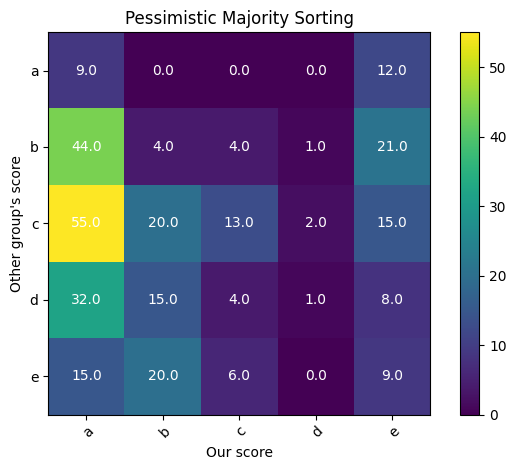

In [27]:
show_confusion_matrix(our_scores, their_scores, 'Pessimistic Majority Sorting', 'Our score', 'Other group\'s score')